
Topic: Project: Manhattan Apartment Prices

## Manhattan

In [2]:
import requests
import time
import re
import os
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

In [2]:
link_rent = "https://www.renthop.com/apartments-for-rent/manhattan-new-york-ny"
path = "/Users/hann/Desktop/Fall 2022/Web Analytics/Lecture/chromedriver"
s = Service(path)
browser = webdriver.Chrome(service = s)
browser.get(link_rent)
time.sleep(3)

In [3]:
def check_exists_by_xpath(xpath):
    try:
        browser.find_element(By.XPATH,xpath)
    except NoSuchElementException:
        return False
    return True

In [4]:
page_num = 10
locations = []
prices = []
apttypes = []
baths = []
neighborhoods = []
districts = []

# Run a for loop to parse the information whithin the page number
for i in range(0, page_num):
    page_source = browser.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    rent_content = soup.find_all('div', class_='search-info d-block align-top')
    
    #extract the rating star and review content
    for rent in rent_content:
        
        address_text = rent.find('a').text.strip()
        price_detail = rent.find('div', class_='d-inline-block align-middle b font-size-20').text[2:].strip()
        apt_type = rent.find('div', style="margin-left: 3px;").text.strip()
        num_bath = rent.find('div', style="margin-left: 1px;").text[:-6].strip()

              
        area = rent.find('div', class_='font-size-8').text[:-12].strip()
        # In case some of the apartments have missing values in neighborhoods, use try-except
        try:
            # Manhattan area
            manhattan = re.findall('(.+),.+Manhattan', area)
            manhattan = ",".join(manhattan)
            man_dist  = re.findall('.+,(.+Manhattan)', area)[0]
            
        except:
            continue

  

    
        #append them into list
        locations.append(address_text)
        prices.append(price_detail)
        apttypes.append(apt_type)
        baths.append(num_bath)
        neighborhoods.append(manhattan)
        districts.append(man_dist)
        
            
   
    #use selenium to click the next button
    if (check_exists_by_xpath('//a[@class="next-page font-blue"]')):
        browser.find_element(By.XPATH,'//a[@class="next-page font-blue"]').click()
        time.sleep(2)


In [5]:
apt_dict = {"Location":locations,
            "Price": prices,
            "Apt Type":apttypes,
            "Num of Bath": baths,
            "Neighborhood": neighborhoods,
            "District": districts}

df = pd.DataFrame(apt_dict)

In [6]:
df

,Location,Price,Apt Type,Num of Bath,Neighborhood,District
0,"240 Waverly Place, Apt 53","5,200",2 Bed,1,West Village,Downtown Manhattan
1,Madison Ave & E 29th St,"4,495",1 Bed\n/ Flex 2,1,NoMad,Midtown Manhattan
2,"316 West 14th Street, Apt 1","2,250",Studio,1,West Village,Downtown Manhattan
3,"155 East 23rd Street, Apt 509","4,000",Studio,1,"Rose Hill, Kips Bay",Midtown Manhattan
4,"225 East 95th Street, Apt C14K...","4,845",2 Bed,2,"Yorkville, Upper East Side",Upper Manhattan
...,...,...,...,...,...,...
215,West 160th Street,"3,500",4 Bed,2,Washington Heights,Upper Manhattan
216,East 79th Street,"2,612",1 Bed,1,Upper East Side,Upper Manhattan
217,"125 West 31st Street, Apt 15J","4,150",1 Bed,1,Midtown South,Midtown Manhattan
218,Wall Street,"3,095",Studio,1,Financial District,Downtown Manhattan


In [9]:
#save the information in a csv file
df.to_csv(r'/Users/hann/Desktop/Fall 2022/Web Analytics/Apartment Info - New Data.csv')

In [7]:
browser.quit()

## Step 2: Data Acquisition

In [3]:
# Open File and load Data
df = pd.read_csv('Apartment Info - 500pg.csv', index_col=False)
df = df.drop(columns=['Unnamed: 0'])
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')
df['Apt Type'] = df['Apt Type'].str.replace('\n','')
df

,Location,Price,Apt Type,Num of Bath,Neighborhood,District
0,"530 West 50th Street, Apt 2 RE...",4500,2 Bed,1,Hell's Kitchen,Midtown Manhattan
1,"524 West 50th Street, Apt 2B",2395,Studio,1,Hell's Kitchen,Midtown Manhattan
2,37 1/2 Bedford St,3200,Studio,1,West Village,Downtown Manhattan
3,"96 5th Avenue, Apt 12A",5750,1 Bed/ Flex 2,1,Flatiron District,Midtown Manhattan
4,"1 Astor Place, Apt 6V",4750,1 Bed,1,NoHo,Downtown Manhattan
...,...,...,...,...,...,...
10844,"19 South William Street, Apt 3...",6300,4 Bed,2,Financial District,Downtown Manhattan
10845,East 48th Street,5350,1 Bed,1,"Turtle Bay, Midtown East",Midtown Manhattan
10846,West 170th Street,2250,1 Bed,1,Washington Heights,Upper Manhattan
10847,"246 Mott Street, Apt 7",4295,1 Bed,1,NoLita,Downtown Manhattan


In [5]:
df['Num of Bath'].unique()
df.loc[df['Num of Bath']=='Shared']

,Location,Price,Apt Type,Num of Bath,Neighborhood,District
10804,East 89th Street,3600,Studio,Shared,"Yorkville, Upper East Side",Upper Manhattan


## Step 3: Data Exploration

In [6]:
print(df.columns.values)

['Location' 'Price' 'Apt Type' 'Num of Bath' 'Neighborhood' 'District']


In [7]:
# Define numeric and categorical variables
cvar_list = ['Apt Type', 'Neighborhood', 'District', 'Num of Bath']
nvar_list = ['Price']

df[cvar_list] = df[cvar_list].astype('category')
df[nvar_list] = df[nvar_list].astype('float64')

Text(0, 0.5, 'Price')

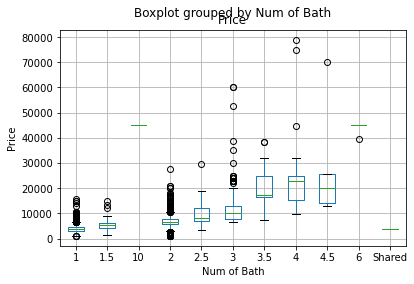

In [8]:
x_var = 'Num of Bath'
y_var = 'Price'

df4ssb = df

ax = df4ssb.boxplot(column=y_var, by=x_var)
# Set the label on the y-axis using set_ylabel method of the object ax
ax.set_ylabel(y_var)

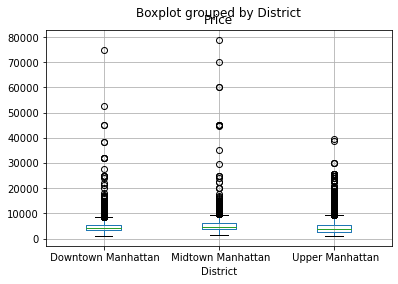

In [9]:
x_var = 'District'
y_var = 'Price'

df4ssb = df

df4ssb.boxplot(column=y_var, by=x_var);

## Step 4: Data Pre-processing

In [10]:
# Missing Value Imputation
print(df.isnull().sum())

# Drop the rows that are missing locaiton
# Updated list with no missing value
df1 = df.dropna()

print(df1.isnull().sum())

df1.shape

Location        8
Price           0
Apt Type        0
Num of Bath     0
Neighborhood    0
District        0
dtype: int64
Location        0
Price           0
Apt Type        0
Num of Bath     0
Neighborhood    0
District        0
dtype: int64


(10841, 6)

## Step 5: Variable Transformation

In [11]:
DV = 'Price'
df2 = df1.dropna(subset=[DV])

cvar_list = ['Apt Type', 'Neighborhood', 'District', 'Num of Bath']
nvar_list = ['Price']

In [12]:
# used to remove dummies 
df2[cvar_list].mode()

,Apt Type,Neighborhood,District,Num of Bath
0,1 Bed,Financial District,Downtown Manhattan,1


In [13]:
## Standardize the numerical variables 
df3 = df2.drop(columns=['Location'])
df4 = df3.copy()
# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df4[cvar_list] = df3[cvar_list].astype('category')
df4[nvar_list] = df3[nvar_list].astype('float64')

df5 = df4.copy()
df5[nvar_list] = (df4[nvar_list] - df4[nvar_list].mean())/df4[nvar_list].std()

In [14]:
# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
# For example, if we choose underscore _, the dummy variable name will be Fuel_Type_Diesel
# If we choose dash -, it will be Fuel_Type-Diesel
df6 = df5.copy()
df6 = pd.get_dummies(df5, prefix_sep='_')

# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['Apt Type_1 Bed', 'Neighborhood_Financial District', 
            'District_ Downtown Manhattan', 'Num of Bath_1']
df7 = df6.copy()
df7 = df6.drop(columns=rdummies)

print(len(df6.columns.values))
print(len(df7.columns.values))

99
95


## Step 5: Data Partition

In [15]:
# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df7
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

          Price  Apt Type_1 Bed/ Flex 2  Apt Type_1 Bed/ Flex 3  \
4779  -0.728561                       0                       0   
6610   0.623508                       0                       0   
386    0.564816                       0                       0   
2625  -0.605645                       0                       0   
10073 -0.296821                       0                       0   
...         ...                     ...                     ...   
2895   0.531321                       0                       0   
7814  -0.430798                       0                       0   
905   -0.150859                       0                       0   
5192  -0.642520                       0                       0   
235    0.162575                       0                       0   

       Apt Type_2 Bed  Apt Type_2 Bed / Flex 3  Apt Type_2 Bed/ Flex 3  \
4779                0                        0                       0   
6610                1                        0 

## Step 7: LASSO Analysis

In [17]:
# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Lasso analysis
# Input:  a Lasso model object which is the output of the function Lasso 
# Output: the estimated coefficients of the model candidate reported by the input Lasso model object
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

In [19]:
# Part 7 Lasso analysis

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: linear_model. 
# Required function name: Lasso, LassoCV

from sklearn.linear_model import Lasso, LassoCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'Price'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Lasso with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 0.05

# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)

#print(summary_coef(clf))

# Rank the importance 
coef = (summary_coef(clf))
coef.columns = ['Est. Coefficient']
coef['Coef Abs'] = coef['Est. Coefficient'].abs()
coef.sort_values(by=['Coef Abs'], ascending=False)

,Est. Coefficient,Coef Abs
Num of Bath_2,0.308005,0.308005
Apt Type_3 Bed,0.246431,0.246431
Apt Type_Studio,-0.243872,0.243872
Intercept,-0.034140,0.034140
"Neighborhood_Manhattan Valley, Upper West Side",-0.000000,0.000000
...,...,...
"Neighborhood_Alphabet City, East Village",-0.000000,0.000000
Num of Bath_Shared,-0.000000,0.000000
Num of Bath_6,0.000000,0.000000
Num of Bath_4.5,0.000000,0.000000


In [21]:
# Run Lasso with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)

# Display the optimal alpha that yields the final selected model (the best model candidate)
print('The optimal alpha is ', clf_optimal.alpha_)

# Display the estimated coefficients of the final selected model
opt_coef = (summary_coef(clf_optimal))
opt_coef.columns = ['Est. Coefficient']
opt_coef['Coef Abs'] = opt_coef['Est. Coefficient'].abs()
opt_coef.sort_values(by=['Coef Abs'], ascending=False).head(10)

The optimal alpha is  0.00011188421026315361


,Est. Coefficient,Coef Abs
Apt Type_8 Bed,11.936340,11.936340
Num of Bath_6,11.705481,11.705481
Num of Bath_4,6.190020,6.190020
Num of Bath_4.5,5.667360,5.667360
Num of Bath_3.5,4.525427,4.525427
Num of Bath_3,1.950924,1.950924
Num of Bath_2.5,1.364358,1.364358
Neighborhood_Midtown,0.830196,0.830196
"Neighborhood_Lenox Hill, Upper East Side",0.768305,0.768305
Neighborhood_SoHo,0.741471,0.741471


In [22]:
# Calcuate the ASE over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted = clf_optimal.predict(X_test)

# Get the number of obs in the test partition
n_obs_test = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test = sum((y_test_actual - y_test_predicted)**2)/n_obs_test


# Derive ASE over the nontest partition based on the definition of ASE
y_nontest_actual = y
y_nontest_predicted = clf_optimal.predict(X)
n_obs_nontest = df_nontestData.shape[0]

ASE_nontest = sum((y_nontest_actual - y_nontest_predicted)**2)/n_obs_nontest

# Compare the ASE over the test partition and the nontest partition.
# If the gap is big, the final selected model might overfit the historical data 
print(ASE_test)
print(ASE_nontest)


0.2341632500409665
0.3509730802737765
